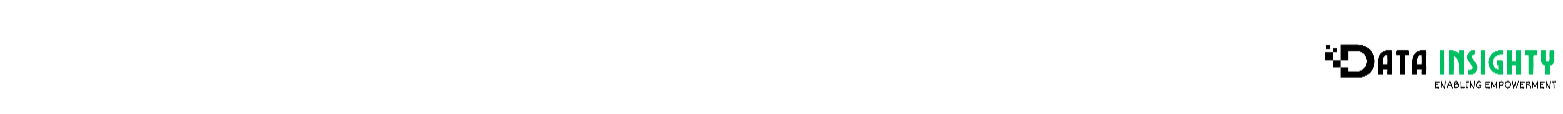

# Support Vector Regression (SVR)

Support Vector Regression (SVR) is a type of Support Vector Machine (SVM) algorithms and is commonly used for regression analysis.

SVM aim to find the optimal hyperplane that best separates the two classes in the input data. 

A hyperplane is a flat subspace of dimension p-1 in a p-dimensional space, where p is the number of input features. 

The optimal hyperplane is the one that maximizes the margin, which is the distance between the hyperplane and the closest data points from each class, known as support vectors.

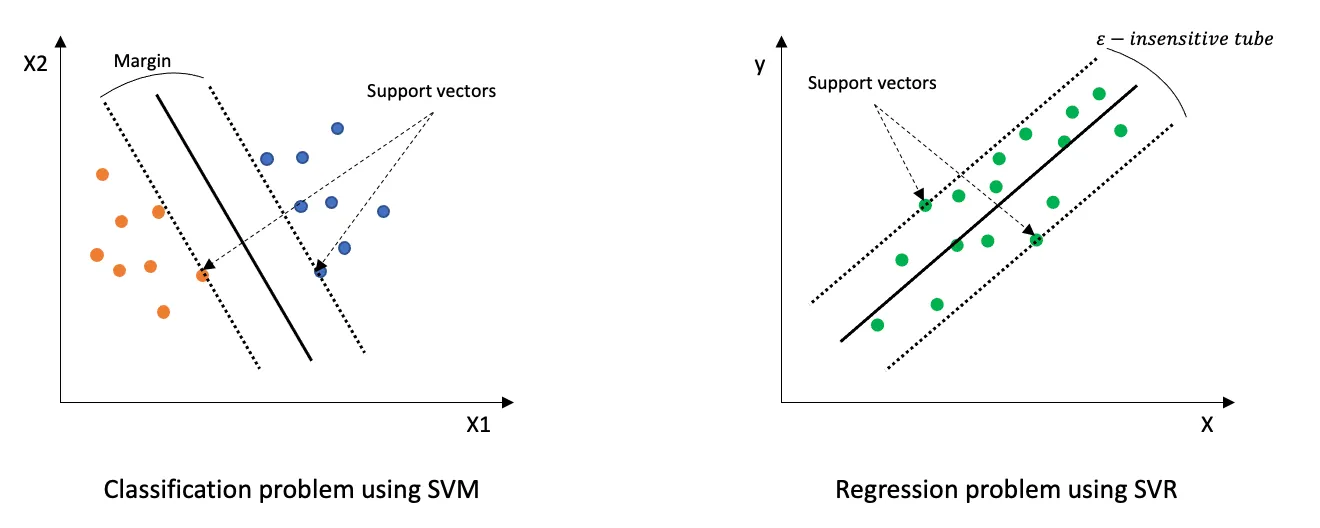

Similar to SVMs, SVR uses the concept of a hyperplane and margin but there are differences in their definitions. 

In SVR, the margin is defined as the error tolerance of the model, which is also called as the ε-insensitive tube. 

This tube allows some deviation of the data points from the hyperplane without being counted as errors. 

The hyperplane is the best fit possible to the data that fall within the 𝜖-insensitive tube.

In SVR, the goal is finding the best fit that accurately predicts the target variable while reducing complexity to avoid overfitting.

#  Support Vector Regression (SVR) with Position-Salaries dataset

In this Regression example we will consider sales based on "Position salries dataset".

In this notebook, we are going to build a Support Vector regression model to predict 'Salary' using ' Level of Position' as the independent variable.

This tutorial covers the following steps:

1. Importing libraries and loading data
2. Understanding the structure of the data
3. Training Simple Linear Regression for entire data
4. Training Polinomial Regression for entire data
4. Predicion using simple Linear Regression and Polinomial Regression

# 1. Importing Librries and Loading data

Pandas is a powerful data manipulation and analysis library, providing data structures and functions to work with structured data.

NumPy is a fundamental package for scientific computing in Python. It provides support for multidimensional arrays and various mathematical functions to operate on these arrays.

Seaborn is a statistical data visualization library built on top of matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. pyplot is a module within Matplotlib that provides a MATLAB-like interface for plotting.

In [1]:
# Importing necessary libraries
import pandas as pd    # For data manipulation and analysis
import numpy as np     # For numerical computing
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots

Data set:https://www.kaggle.com/datasets/akram24/position-salaries/code downloded and saved in Local machine

In [2]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# 2. Understanding the Data

In [3]:
# Let's check the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [4]:
# Identify variable types
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['Level', 'Salary'], dtype='object')
Categorical columns: Index(['Position'], dtype='object')



Frequency distribution for Position
Business Analyst     1
Junior Consultant    1
Senior Consultant    1
Manager              1
Country Manager      1
Region Manager       1
Partner              1
Senior Partner       1
C-level              1
CEO                  1
Name: Position, dtype: int64

Distribution for Level


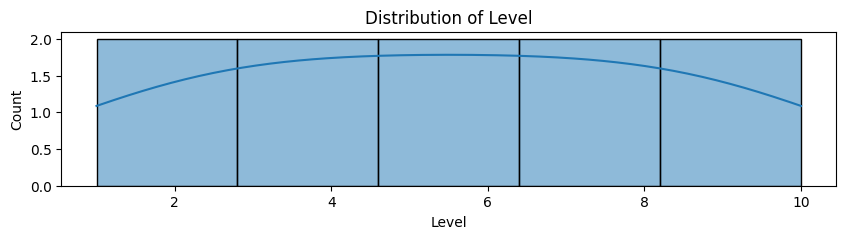


Distribution for Salary


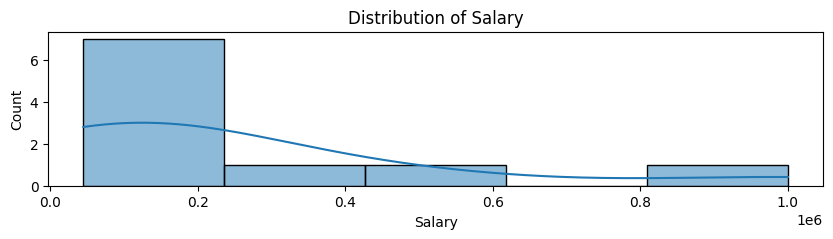

In [5]:
# Create frequency distributions
for col in categorical_cols:
    print("\nFrequency distribution for", col)
    print(df[col].value_counts())

for col in numerical_cols:
    print("\nDistribution for", col)
    plt.figure(figsize=(10, 2))
    sns.histplot(df[col], kde=True)
    plt.title("Distribution of " + col)
    plt.show()

In [6]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [7]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [8]:
y = y.reshape(len(y),1)

In [9]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature Scaling

In [10]:
# Importing the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Initializing StandardScaler for feature scaling
sc_X = StandardScaler()

# Initializing StandardScaler for target variable scaling
sc_y = StandardScaler()

# Scaling the feature matrix X using the fit_transform method of StandardScaler
X = sc_X.fit_transform(X)

# Scaling the target variable y using the fit_transform method of StandardScaler
y = sc_y.fit_transform(y)


In [11]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [12]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# 3. Perfroming Support Vector Regression (SVR)

## Training the Support Vector Regression (SVR) model on the whole dataset

In [13]:
# Importing the Support Vector Regression (SVR) class from the sklearn library
from sklearn.svm import SVR

# Initializing the SVR model with the radial basis function (RBF) kernel
regressor = SVR(kernel='rbf')

# Fitting the SVR model to the training data (X: features, y: target variable)
regressor.fit(X, y.ravel())  # Using ravel() to convert y to a 1D array


SVR()

## Visualising the Support Vector Regression (SVR) results

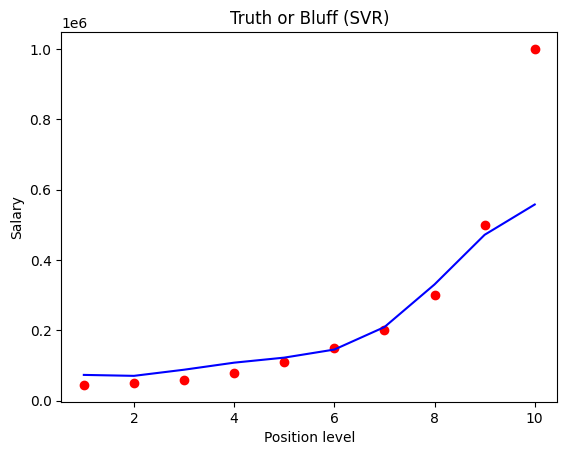

In [14]:
# Plotting the original data points (position levels vs. salaries) after inverse transformation
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')

# Plotting the SVR model predictions on the original X values after inverse transformation
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue')

# Adding a title to the plot
plt.title('Truth or Bluff (SVR)')

# Adding labels to the X and Y axes
plt.xlabel('Position level')
plt.ylabel('Salary')

# Displaying the plot
plt.show()


# Visualising the SVR results (for higher resolution and smoother curve)

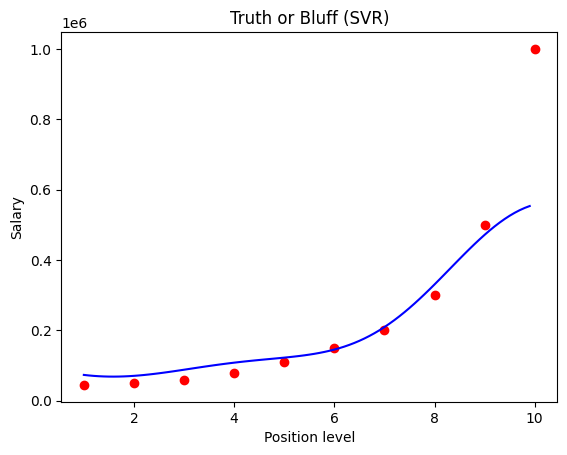

In [15]:
# Generating a range of values for the X-axis (position levels) using the inverse transformation of scaled features
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)

# Reshaping the X_grid array to be a column vector
X_grid = X_grid.reshape((len(X_grid), 1))

# Plotting the original data points (position levels vs. salaries) after inverse transformation
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')

# Plotting the SVR model predictions on the X_grid values after transformation
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color='blue')

# Adding a title to the plot
plt.title('Truth or Bluff (SVR)')

# Adding labels to the X and Y axes
plt.xlabel('Position level')
plt.ylabel('Salary')

# Displaying the plot
plt.show()


# Predicting a new result with Support Vector Regression (SVR)

In [16]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

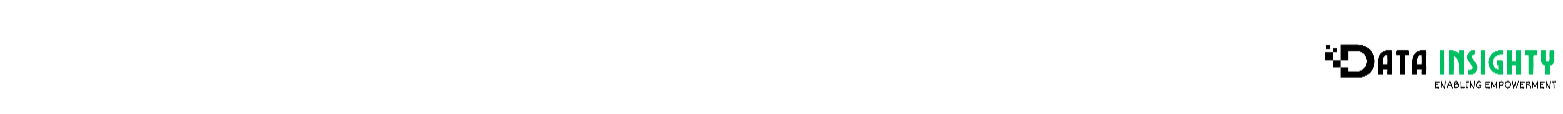